<a href="https://colab.research.google.com/github/carbaluar/Presentaci-n/blob/main/1vc_CRR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Carga de datos

holaaaa fdsf

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import sqlite3
import datetime

In [ ]:
df = pd.read_excel('/content/DBImpurezas.xlsx')
df.head()

,SODIO,CALCIO,CRR,CRD,CRRbin
0,600,260,85.6581,3.5554,1
1,380,250,85.6581,3.5554,1
2,350,240,85.6581,3.5554,1
3,410,270,85.6581,3.5554,1
4,460,280,85.6581,3.5554,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3080 entries, 0 to 3079
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SODIO   3080 non-null   int64  
 1   CALCIO  3080 non-null   int64  
 2   CRR     3080 non-null   float64
 3   CRD     3080 non-null   float64
 4   CRRbin  3080 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 120.4 KB


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# divido entre train y test/validación en 70%/30%
df_train, df_test_validation = train_test_split(df, train_size=0.7, stratify = df["CRRbin"])

In [ ]:

# divido entre train y test/validación en 15% y 15%
df_test, df_validation = train_test_split(df_test_validation, train_size=0.5, stratify = df_test_validation["CRRbin"])

In [ ]:
df_train.shape

(2156, 5)

In [ ]:
df_test.shape

(462, 5)

In [ ]:
df_validation.shape

(462, 5)

### Modelo Gaussiano

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
clf = GaussianNB(priors=None, var_smoothing= 0.1)

In [ ]:
df_train2 = df_train[["SODIO","CALCIO","CRRbin"]].copy()

In [ ]:
clf.fit(df_train2.drop("CRRbin",axis=1), df_train2["CRRbin"])

GaussianNB(priors=None, var_smoothing=0.1)

In [ ]:
clf.score(df_train2.drop("CRRbin",axis=1), df_train2["CRRbin"])

0.564935064935065

In [ ]:
df_validation2 = df_validation[["SODIO","CALCIO","CRRbin"]].copy()
df_test_validation2 = df_test_validation[["SODIO","CALCIO","CRRbin"]].copy()

In [ ]:
clf.score(df_validation2.drop("CRRbin",axis=1), df_validation2["CRRbin"])


0.564935064935065

In [ ]:
BuscaSmoot = [0.1, 0.001, 0.0001, 0.00001, 0.000001, 0.000000000001]

In [ ]:
scores = list()
for busca in BuscaSmoot:
    clf = GaussianNB(var_smoothing = busca)
    clf.fit(df_train2.drop("CRRbin",axis=1), df_train2["CRRbin"])
    scores.append(clf.score(df_validation2.drop("CRRbin",axis=1), df_validation2["CRRbin"]))

print("Máximo score con un smoothing de: ", BuscaSmoot[scores.index(max(scores))], "--> valor de Score: ", max(scores))

Máximo score con un smoothing de:  0.001 --> valor de Score:  0.5735930735930735


Dato Obtenido

In [ ]:
from sklearn.metrics import confusion_matrix, roc_auc_score
import numpy as np
df_train2.head()

,SODIO,CALCIO,CRRbin
1309,401,200,1
64,510,210,1
1098,336,172,1
2832,320,160,0
2932,318,130,0


In [ ]:
clf.predict(np.array([[400,300]]))

array([0])

Matriz

In [ ]:
y_true = 1*np.array(df_validation2["CRRbin"])

In [ ]:
y_pred = clf.predict_proba(df_validation2.drop("CRRbin",axis=1))

In [ ]:
print("Matriz de Confusión Alfa 0.25")
print(confusion_matrix(y_true,y_pred[:,1]>0.25))

Matriz de Confusión Alfa 0.25
[[258   3]
 [196   5]]


In [ ]:
from sklearn.metrics import fbeta_score

In [ ]:
print("Valor de F1 para un alfa= 0.25 -->", fbeta_score(y_true, y_pred[:,1]>0.25, beta=1))

Valor de F1 para un alfa= 0.25 --> 0.04784688995215311


In [ ]:
print("Valor de Fbetascore para un alfa= 0.25 -->", fbeta_score(y_true, y_pred[:,1]>0.25, beta=2))

Valor de Fbetascore para un alfa= 0.25 --> 0.030788177339901482


In [ ]:
alfa = 0.02
recalls = np.zeros(100)
precisions= np.zeros(100)
FPR = np.zeros(100)
alfas = np.linspace(0,1,100)
for idx,alfa in enumerate(alfas):
    tn, fp, fn, tp = confusion_matrix(y_true,y_pred[:,1]>alfa).ravel()
    recalls[idx] = (tp/(tp+fn))
    precisions[idx] = (tp/(tp+fp))
    FPR[idx]= (fp/(fp+tn))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in long_scalars
  if __name__ == '__main__':


In [ ]:
print("Para un alfa 0.25 --> Valor de recall", recalls[25], "Valor de Precisions", precisions[25], "Valor de FPR", FPR[25])
print("Para un alfa 0.5 --> Valor de recall", recalls[50], "Valor de Precisions", precisions[50], "Valor de FPR", FPR[50])
print("Para un alfa 0.75 --> Valor de recall", recalls[75], "Valor de Precisions", precisions[75], "Valor de FPR", FPR[75])

Para un alfa 0.25 --> Valor de recall 0.024875621890547265 Valor de Precisions 0.625 Valor de FPR 0.011494252873563218
Para un alfa 0.5 --> Valor de recall 0.01990049751243781 Valor de Precisions 1.0 Valor de FPR 0.0
Para un alfa 0.75 --> Valor de recall 0.014925373134328358 Valor de Precisions 1.0 Valor de FPR 0.0


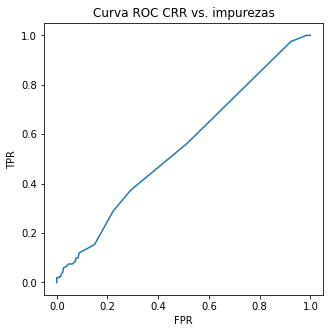

In [ ]:
plt.figure(figsize=[5,5])
plt.plot(FPR,recalls)
plt.title("Curva ROC CRR vs. impurezas")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()